In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

binary classification 

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

ŷ<0 : class -1  
ŷ>0 : class +1


線形モデルを学習するアルゴリズムを特徴づけるもの  
1. 訓練データのフィット方法
2. 正則化を使うかどうか、またどの正則化を使うか

二つの良く用いられる分類アルゴリズム

+ Logistic Regression (Regressionという名前だが分類アルゴリズムなので注意)  
+ Linear SVMs(Suppor Vector Machines)
  
両方ともデフォルトではL2正則化を採用

# Forge dataset で試す

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [3]:
X, y = mglearn.datasets.make_forge()

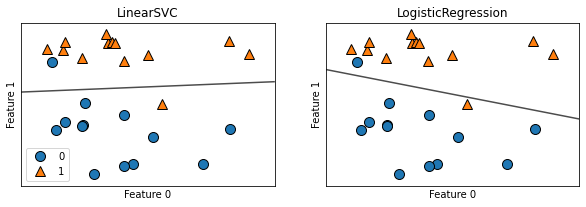

In [4]:

flg, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=10000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X,  fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{clf.__class__.__name__}")
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
axes[0].legend()
plt.show()


LogisticRegression とLinearSVCにおけるある正則化の強さを決定するトレードオフパラメータはCと呼ばれる。  
Cを大きくすると正則化（均一化）を弱めることになる。（モデルの複雑化）  
Cを小さくすることは重みにより強い制限をかけることになる（モデルの単純化）

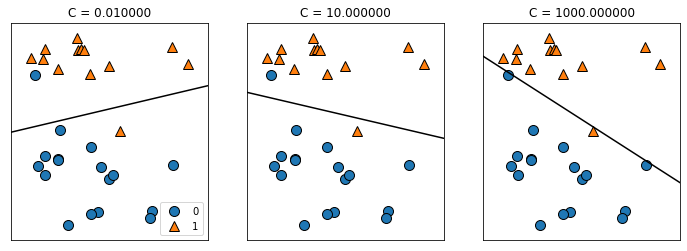

In [5]:
mglearn.plots.plot_linear_svc_regularization()

左からC=0.01、1.、100.  
Cを大きくするとすべての訓練データに合うように学習する（overfitting）

# 多次元特徴量をもつデータセットの分類問題に対するLinearModelの威力をみる 

# Breast Cancer dataset

In [6]:
from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [8]:
cancer.data.shape

(569, 30)

In [25]:
logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

C:\Users\shuta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.960093896713615
0.951048951048951


defaultでC=1  
testデータに対するパフォーマンスの方良い➡underfitting  
複雑性を上げたい➡Cを大きくする

In [28]:
logreg100 = LogisticRegression(C=100, max_iter=1000).fit(X_train, y_train)
print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))

0.9741784037558685
0.965034965034965


C:\Users\shuta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


testの方が小さくなった  

逆にCを小さくする（モデルを単純化する）とどうなるか

In [30]:
logreg0001=LogisticRegression(C=0.001, max_iter=1000).fit(X_train, y_train)
print(logreg0001.score(X_train, y_train))
print(logreg0001.score(X_test, y_test))

0.9530516431924883
0.9440559440559441


In [31]:
logreg.coef_.shape

(1, 30)

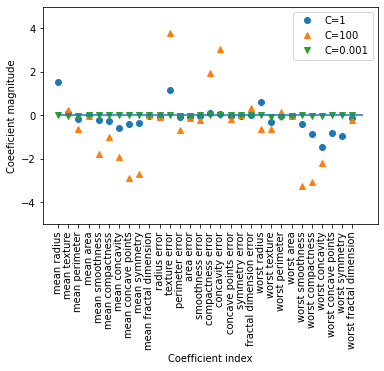

In [32]:
plt.plot(logreg.coef_.T, "o", label="C=1")
plt.plot(logreg100.coef_.T, "^", label="C=100")
plt.plot(logreg0001.coef_.T, "v", label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coeeficient magnitude")
plt.legend()

LogisticRegression デフォルトでL2正則化を採用

L1正則化を採用すると影響力の小さいパラメータを落とすためモデルの解釈がしやすくなる

Training accuracy of L1 LogReg with C = 0.001 : 0.9131455399061033
Test accuracy of L1 LogReg with C = 0.001 : 0.9230769230769231

Training accuracy of L1 LogReg with C = 1 : 0.960093896713615
Test accuracy of L1 LogReg with C = 1 : 0.958041958041958

Training accuracy of L1 LogReg with C = 100 : 0.9859154929577465
Test accuracy of L1 LogReg with C = 100 : 0.9790209790209791



C:\Users\shuta\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


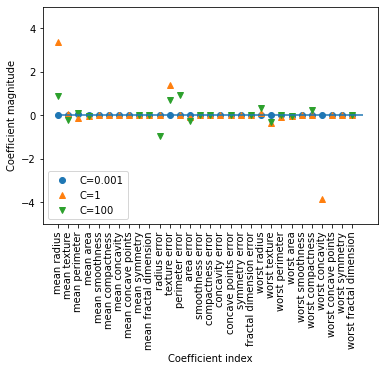

In [46]:
for C, marker in zip([0.001, 1, 100], ["o", "^", "v"]):
    lr_L1 = LogisticRegression(C=C, penalty="l1", solver="liblinear").fit(X_train, y_train)
    print(f"Training accuracy of L1 LogReg with C = {C} : {lr_L1.score(X_train, y_train)}")
    print(f"Test accuracy of L1 LogReg with C = {C} : {lr_L1.score(X_test, y_test)}")
    print()
    plt.plot(lr_L1.coef_.T, marker ,label=f"C={C}")
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)